In [ ]:
#importing files (1.1)
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import pickle
import warnings
warnings.filterwarnings("ignore")

#model keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

pip install pandas numpy scikit-learn tensorflow

#!pip install scikit-learn==1.6.1 --quiet
from scikeras.wrappers import KerasClassifier

In [5]:
#read dataset
data= pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# data preparation
#rename the columns(2.1)
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood glucose random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia', 'class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
#Handling missing values(2.2)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
data.isnull().any()

,0
id,False
age,True
blood_pressure,True
specific_gravity,True
albumin,True
sugar,True
red_blood_cells,True
pus_cell,True
pus_cell_clumps,True
bacteria,True


In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
#mean
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce') #as pcv object
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce') #object
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')    #object
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)

In [ ]:
#mode
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
blood glucose random,0


In [ ]:
catcols = set(data.dtypes[data.dtypes=='object'].index.values)
print(catcols)


{'bacteria', 'pus_cell_clumps', 'class', 'anemia', 'pedal_edema', 'coronary_artery_disease', 'pus_cell', 'diabetesmellitus', 'hypertension', 'red_blood_cells', 'appetite'}


In [ ]:
for i in catcols:
    print("Columns ", i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns  bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

Columns  pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

Columns  class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Columns  anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Columns  pedal_edema
Counter({'no': 324, 'yes': 76})
************************************************************************************************************************

Columns  coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
******************

In [ ]:
# CLEANING 'class' and other string columns before label encoding
####FIXXXX

data['class'] = data['class'].astype(str).str.strip().str.lower()
data['class'] = data['class'].replace({'ckd\t': 'ckd', 'ckd ': 'ckd', 'notckd ': 'notckd'})

#replace

# Fix coronary_artery_disease
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
#data['coronary_artery_disease'] = data['coronary_artery_disease'].map({'no': 0, 'yes': 1})
c(data['coronary_artery_disease'])




Counter({'no': 366, 'yes': 34})

In [ ]:
  # Fix coronary_artery_disease
  data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
  #data['diabetesmellitus'] = data['diabetesmellitus'].map({'no': 0, 'yes': 1})
  c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 263})

In [ ]:
#no need to remove
#label encoding (2.3.1)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [ ]:
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

In [ ]:
#Handeling numerical
contcols = set(data.dtypes[data.dtypes!='object'].index)
print(contcols)


{'albumin', 'packed_cell_volume', 'white_blood_cell_count', 'sodium', 'serum_creatinine', 'age', 'blood_pressure', 'red_blood_cell_count', 'pus_cell_clumps', 'class', 'potassium', 'pus_cell', 'blood_urea', 'appetite', 'anemia', 'pedal_edema', 'coronary_artery_disease', 'diabetesmellitus', 'bacteria', 'blood glucose random', 'sugar', 'specific_gravity', 'hemoglobin', 'hypertension', 'red_blood_cells'}


In [ ]:
#fix
# Columns with numeric dtype
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Now filter out the categorical ones that were just label-encoded
# (i.e., columns with very few unique values like 'yes/no' or 'present/absent')
contcols = [col for col in num_cols if data[col].nunique() > 5]

print("Continuous Columns:", contcols)

Continuous Columns: ['age', 'blood_pressure', 'albumin', 'sugar', 'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [ ]:
for i in contcols:
  print("Continuous Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continuous Columns: age
Counter({60.0: 28, 65.0: 17, 48.0: 12, 50.0: 12, 55.0: 12, 47.0: 11, 62.0: 10, 45.0: 10, 54.0: 10, 59.0: 10, 56.0: 10, 61.0: 9, 70.0: 9, 46.0: 9, 34.0: 9, 68.0: 8, 73.0: 8, 64.0: 8, 71.0: 8, 57.0: 8, 63.0: 7, 72.0: 7, 67.0: 7, 30.0: 7, 42.0: 6, 69.0: 6, 35.0: 6, 44.0: 6, 43.0: 6, 33.0: 6, 51.0: 5, 52.0: 5, 53.0: 5, 75.0: 5, 76.0: 5, 58.0: 5, 41.0: 5, 66.0: 5, 24.0: 4, 40.0: 4, 39.0: 4, 80.0: 4, 23.0: 4, 74.0: 3, 38.0: 3, 17.0: 3, 8.0: 3, 32.0: 3, 37.0: 3, 25.0: 3, 29.0: 3, 21.0: 2, 15.0: 2, 5.0: 2, 12.0: 2, 49.0: 2, 19.0: 2, 36.0: 2, 20.0: 2, 28.0: 2, 7.0: 1, 82.0: 1, 11.0: 1, 26.0: 1, 81.0: 1, 14.0: 1, 27.0: 1, 83.0: 1, 4.0: 1, 3.0: 1, 6.0: 1, 90.0: 1, 78.0: 1, 2.0: 1, 22.0: 1, 79.0: 1})
************************************************************************************************************************

Continuous Columns: blood_pressure
Counter({80.0: 116, 70.0: 112, 60.0: 71, 90.0: 53, 100.0: 25, 76.46907216494846: 12, 50.0: 5, 110.0: 3, 140.0: 1, 180.0: 

In [ ]:
print("Catcols:",catcols,len(catcols))
print("Contcols:",contcols,len(contcols))


Catcols: ['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells'] 11
Contcols: ['age', 'blood_pressure', 'albumin', 'sugar', 'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'] 13


In [ ]:
#remove
contcols.remove('albumin')
contcols.remove('sugar')
print("Contcols:",contcols)

Contcols: ['age', 'blood_pressure', 'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [ ]:
#Fix
catcols = set(catcols)  # convert list to set
#add
catcols.add('albumin')
catcols.add('sugar')
catcols.add('specific_gravity')
print("Catcols:",catcols)

Catcols: {'albumin', 'pus_cell_clumps', 'class', 'sugar', 'anemia', 'pedal_edema', 'coronary_artery_disease', 'hypertension', 'pus_cell', 'diabetesmellitus', 'specific_gravity', 'bacteria', 'red_blood_cells', 'appetite'}


In [ ]:
#replace

# Fix coronary_artery_disease
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
#data['coronary_artery_disease'] = data['coronary_artery_disease'].map({'no': 0, 'yes': 1})
c(data['coronary_artery_disease'])


Counter({0: 366, 1: 34})

In [ ]:
  # Fix coronary_artery_disease
  data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
  #data['diabetesmellitus'] = data['diabetesmellitus'].map({'no': 0, 'yes': 1})
  c(data['diabetesmellitus'])

Counter({1: 137, 0: 263})

In [ ]:
#exploratory data analysis
#milestone 3
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='age', ylabel='Density'>

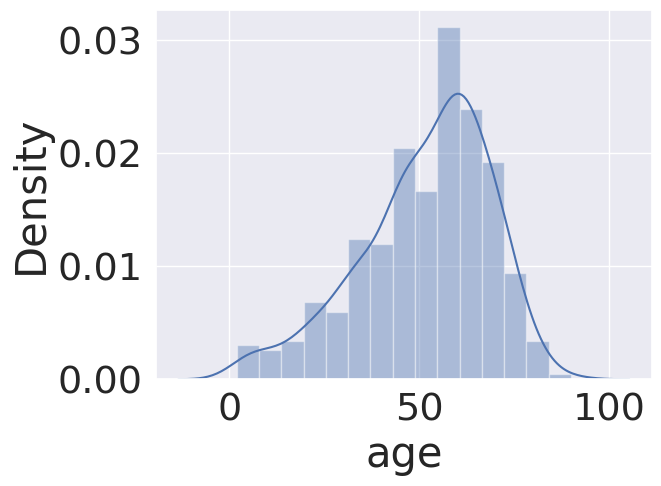

In [ ]:
#visual analysis(2)
#Univariate(2.1)
sns.distplot(data.age)



Text(0.5, 1.0, 'age VS blood_pressure')

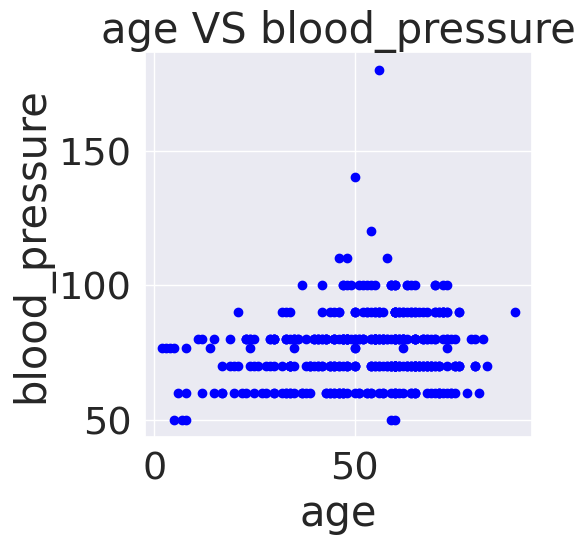

In [ ]:
#bivariate(2.2)
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age VS blood_pressure")

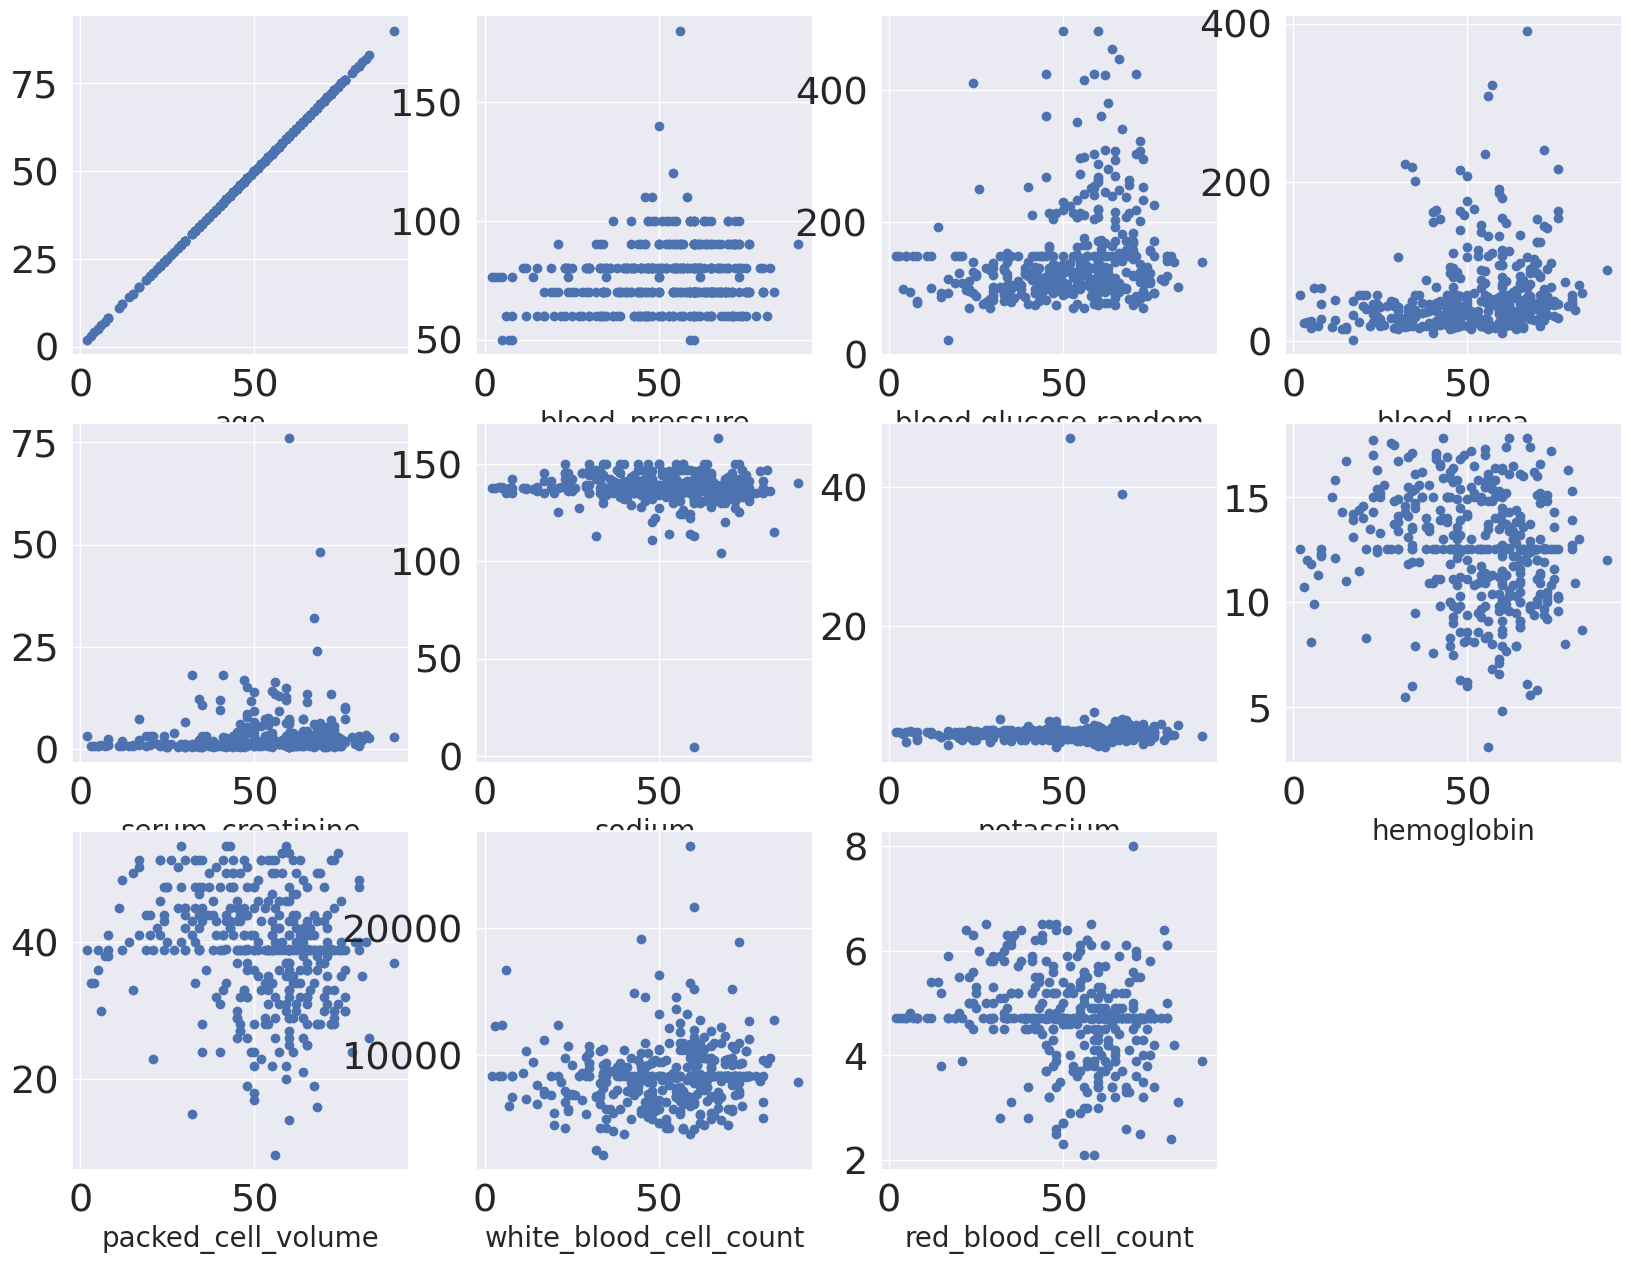

In [ ]:
#Multivariate(2.3)
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in contcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
    #plt.ylabel(column,fontsize=20)
  plotnumber+=1
plt.show()

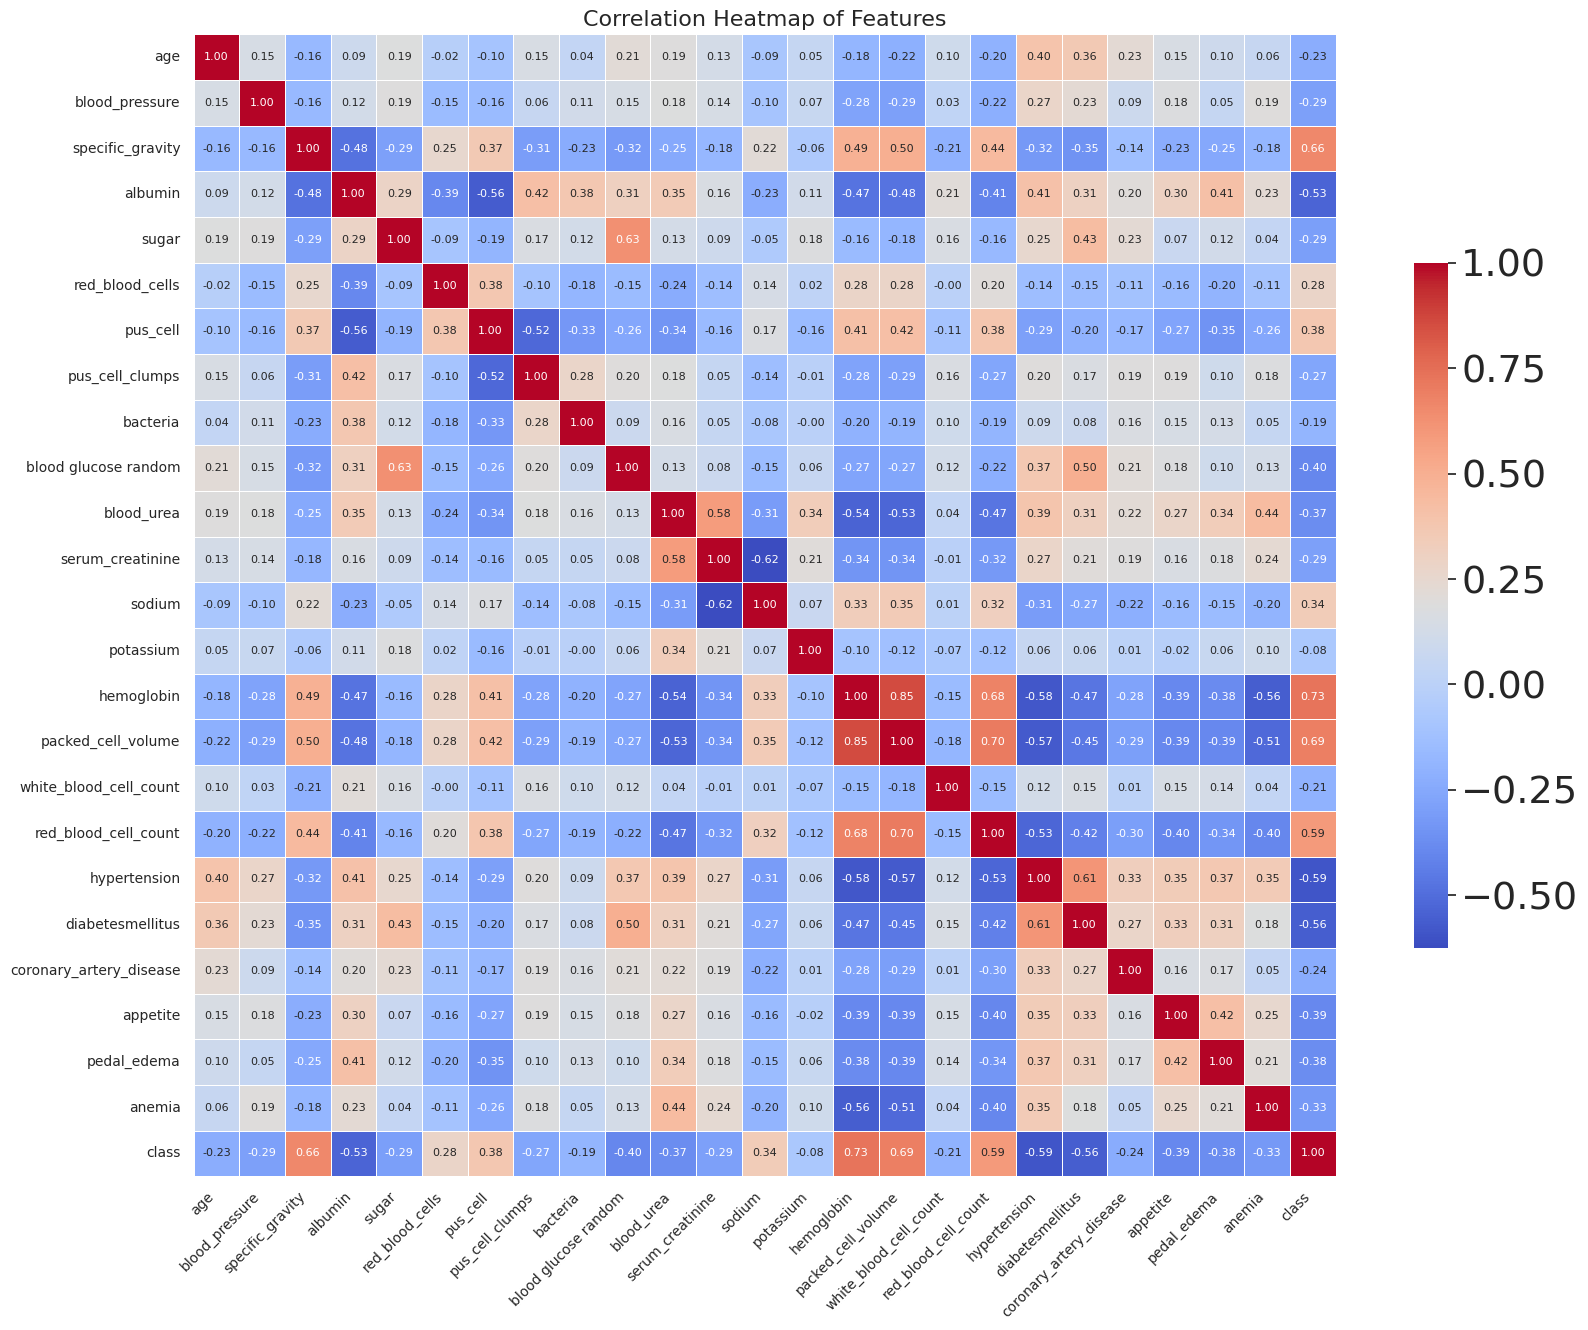

In [ ]:
#correlation between independent columns
#heatmap
plt.figure(figsize=(18, 14))
corr_matrix = data.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.6},
    annot_kws={"size": 8}  # smaller annotation text
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.tight_layout()
plt.show()


<Axes: xlabel='class', ylabel='count'>

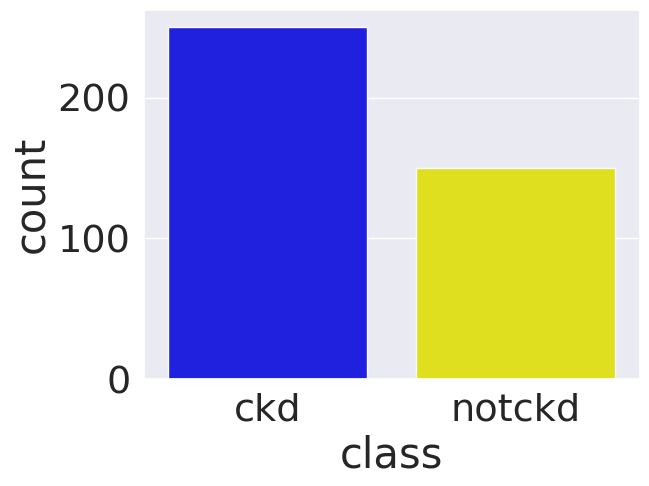

In [ ]:
#count target class
#sns.countplot(data['class'])
sns.countplot(x='class', data=data.replace({0: 'ckd', 1: 'notckd'}), palette={'ckd': 'blue', 'notckd': 'yellow'})


In [ ]:
#ensuring x contains only features
print("Shape of x (features):", x.shape)
print("Columns in x:", x.columns.tolist())
print("Does x contain 'class'? ->", 'class' in x.columns)

#confirm data types
print(x.dtypes.value_counts())

#checking missing value
x.isnull().sum().sum()



Shape of x (features): (400, 8)
Columns in x: ['red_blood_cells', 'pus_cell', 'blood glucose random', 'blood_urea', 'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease']
Does x contain 'class'? -> False
int64      6
float64    2
Name: count, dtype: int64


np.int64(0)

In [ ]:
#Scalling
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [ ]:
#Separate independent and dependent
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [ ]:
#Splitting into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Model building
####ANN, Random forest, decision tree, logistics

#ANN Model(1.1)
classification = Sequential()
classification.add(Dense(units = 30, activation = 'relu'))
classification.add(Dense(units = 128, activation = 'relu'))
classification.add(Dense(units = 64, activation = 'relu'))
classification.add(Dense(units = 32, activation = 'relu'))
classification.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
#ANN- Compiling
classification.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#ANN- Training
classification.fit(x_train, y_train, batch_size = 10,validation_split=0.2, epochs = 100)
start_fit = time.time()
classification.fit(x_train, y_train, batch_size=10, validation_split=0.2, epochs=100, verbose=0)
fit_time = time.time() - start_fit
# Measure scoring time
start_score = time.time()
y_pred_prob = classification.predict(x_test)
score_time = time.time() - start_score


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4985 - loss: 4.5257 - val_accuracy: 0.5938 - val_loss: 0.5629
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6296 - loss: 0.6215 - val_accuracy: 0.5938 - val_loss: 0.5380
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6108 - loss: 0.5413 - val_accuracy: 0.6719 - val_loss: 0.5571
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6825 - loss: 0.5483 - val_accuracy: 0.6406 - val_loss: 0.5964
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5958 - loss: 0.6252 - val_accuracy: 0.6406 - val_loss: 0.5683
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6365 - loss: 0.5769 - val_accuracy: 0.5938 - val_loss: 0.5154
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6011 - loss: 0.5433 - val_accuracy: 0.5938 - val_loss: 0.6989
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6153 - loss: 0.6314 - val_accuracy: 0.5938 -

In [ ]:
# Post-process prediction
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate ANN
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nModel: ANN")
print(classification_report(y_test, y_pred, target_names=target_names))

# Store ANN results
ann_result = pd.DataFrame([{
    'fit_time': fit_time,
    'score_time': score_time,
    'accuracy': accuracy,
    'precision_weighted': precision,
    'recall_weighted': recall,
    'f1_weighted': f1,
    'roc_auc': roc_auc,
    'model': 'ANN'
}])

dfs.append(ann_result)


Model: ANN
              precision    recall  f1-score   support

      NO CKD       1.00      0.96      0.98        52
         CKD       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:
#Trying
# Define scikit-learn models
sklearn_models = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
]

# Metrics for scoring
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']  # Adjust if your classes are encoded differently

# Store results from all models
dfs = []

# Train and evaluate sklearn models
for name, model in sklearn_models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, target_names=target_names))

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)


Model: LogisticRegression
              precision    recall  f1-score   support

      NO CKD       0.98      0.98      0.98        52
         CKD       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Model: RandomForest
              precision    recall  f1-score   support

      NO CKD       0.98      0.98      0.98        52
         CKD       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Model: DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.94      0.94      0.94        52
         CKD       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weigh

In [ ]:
# Combine all model results into one DataFrame
final_results = pd.concat(dfs, ignore_index=True)
print("\nFinal Combined Results:")
print(final_results)


Final Combined Results:
    fit_time  score_time  test_accuracy  test_precision_weighted  \
0   0.537981    0.101443       0.921875                 0.923047   
1   0.065672    0.084876       0.906250                 0.916624   
2   0.428047    0.075348       0.843750                 0.882038   
3   0.073030    0.089264       0.921875                 0.935345   
4   0.066943    0.094767       0.875000                 0.887500   
5   0.277219    0.071144       0.921875                 0.921571   
6   0.261112    0.064271       0.921875                 0.928173   
7   0.261717    0.069338       0.906250                 0.918313   
8   0.265262    0.064618       0.890625                 0.896772   
9   0.260835    0.059898       0.890625                 0.893487   
10  0.005466    0.040244       0.828125                 0.830078   
11  0.005232    0.039055       0.843750                 0.855643   
12  0.005140    0.036510       0.859375                 0.861861   
13  0.005985    0.04976

In [ ]:
#FOR COMPARISON of ANN
ann_model = KerasClassifier(model=build_ann, epochs=100, batch_size=10, verbose=0)

In [ ]:
#
#Random Forest Model(1.2)
rfc= RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict=rfc.predict(x_test)

In [ ]:
y_predict_train=rfc.predict(x_train)

In [ ]:
#
#Decision Tree Model(1.3)
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict=dtc.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
y_predict_train=dtc.predict(x_train)

In [ ]:
#
#Logistic Regression(2.4)
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Predicting our output
y_predict=lgr.predict(x_test)

In [ ]:
#####Testing the model
##Activity 2

#logistic
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[0]


array([0])

In [ ]:
#Decision tree
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[0]


array([0])

In [ ]:
#Random Forest
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[0]


array([0])

In [ ]:
#ANN
classification.save("ckd.h5")

In [ ]:
y_pred=classification.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
#y_pred

In [ ]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [ ]:
def predict_ckd(sample_value):
    sample_value = np.array(sample_value).reshape(1, -1)
    sample_value = sc.transform(sample_value)  # Use the same scaler used on training data
    prediction = classification.predict(sample_value)

    if prediction[0][0] > 0.5:  # Output from sigmoid
        return 'Prediction: High Chance of CKD!'
    else:
        return 'Prediction: Low Chance of CKD!'


In [ ]:
test_input = np.array([[1, 1, 121.0, 36.0, 0, 0, 1, 0]])
print(predict_ckd(test_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: High Chance of CKD!


In [ ]:
ann_results = {
    'fit_time': [None],
    'score_time': [None],
    'test_score': [None],
    'accuracy': [0.95],
    'precision_weighted': [0.957],
    'recall_weighted': [0.95],
    'f1_weighted': [0.951],
    'roc_auc': [0.993]
}

In [ ]:
#### Performance Testing & Evaluate results
#Testing with multiple evaluation metrics

# Define models
sklearn_models = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
]

# Scoring metrics and target class names
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']

# Store results
dfs = []

# Cross-validation loop
for name, model in sklearn_models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

    # Train and predict

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Save CV results
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

fit_time = None
score_time = None

#ANN
ann_result = pd.DataFrame([{
    'fit_time': fit_time,
    'score_time': score_time,
    'accuracy': accuracy,
    'precision_weighted': precision,
    'recall_weighted': recall,
    'f1_weighted': f1,
    'roc_auc': roc_auc,
    'model': 'ANN'
}])
dfs.append(ann_result)

# Combine all results into one DataFrame
final_results = pd.concat(dfs, ignore_index=True)


Model: LogisticRegression
              precision    recall  f1-score   support

      NO CKD       0.98      0.98      0.98        52
         CKD       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Model: RandomForest
              precision    recall  f1-score   support

      NO CKD       0.98      0.98      0.98        52
         CKD       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Model: DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.94      0.96      0.95        52
         CKD       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted

In [ ]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[51,  1],
       [ 1, 27]])

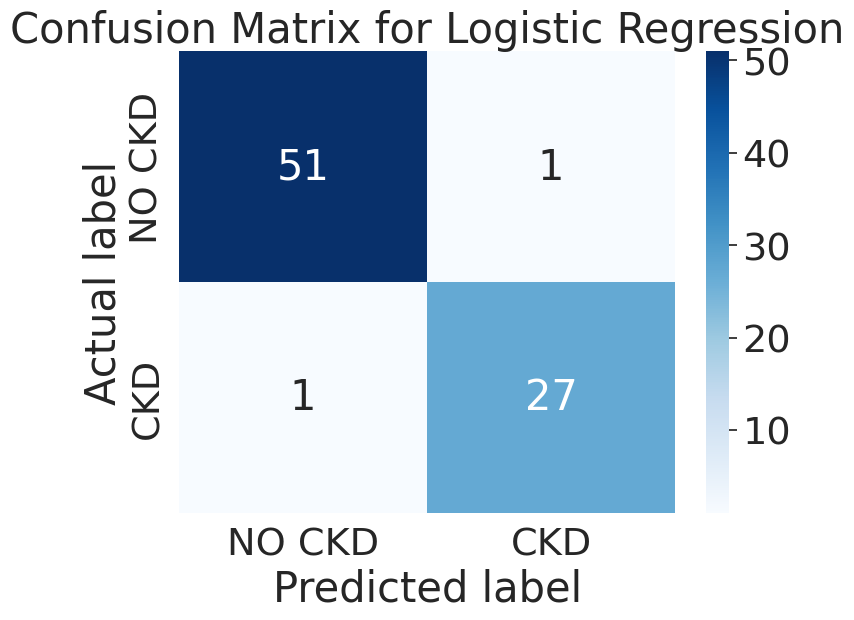

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['NO CKD', 'CKD'], yticklabels=['NO CKD', 'CKD'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [ ]:
#RF
cm=confusion_matrix(y_test,y_predict)
cm

array([[51,  1],
       [ 1, 27]])

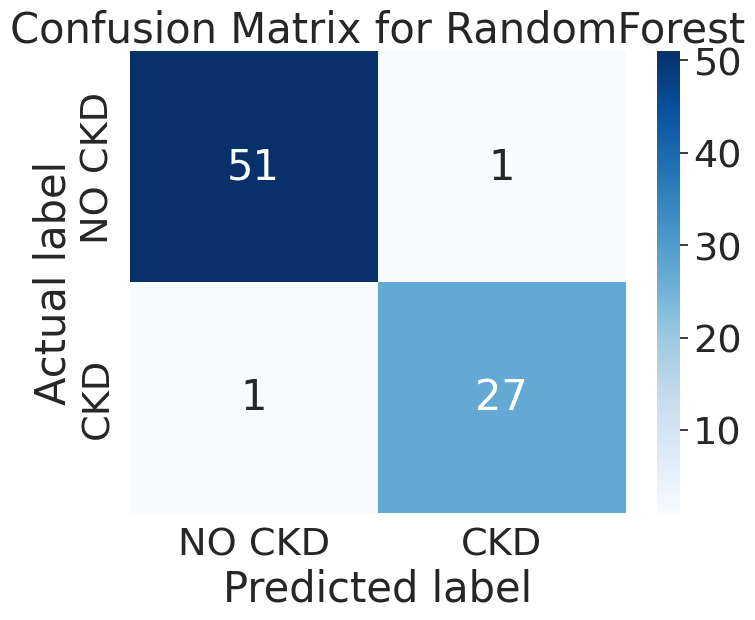

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['NO CKD', 'CKD'], yticklabels=['NO CKD', 'CKD'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for RandomForest')
plt.show()


In [ ]:
#Decision Tree
cm=confusion_matrix(y_test,y_predict)
cm

array([[51,  1],
       [ 1, 27]])

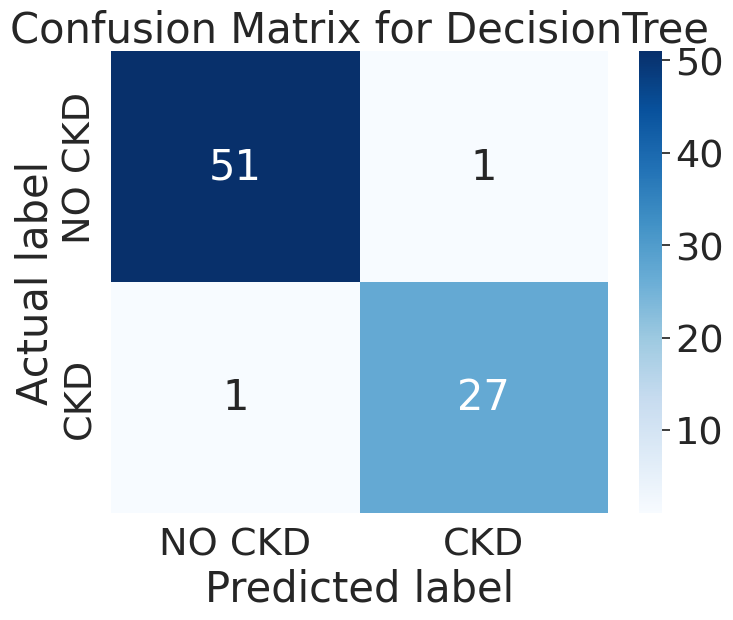

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['NO CKD', 'CKD'], yticklabels=['NO CKD', 'CKD'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for DecisionTree')
plt.show()


In [ ]:
#ANN
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [ 3, 25]])

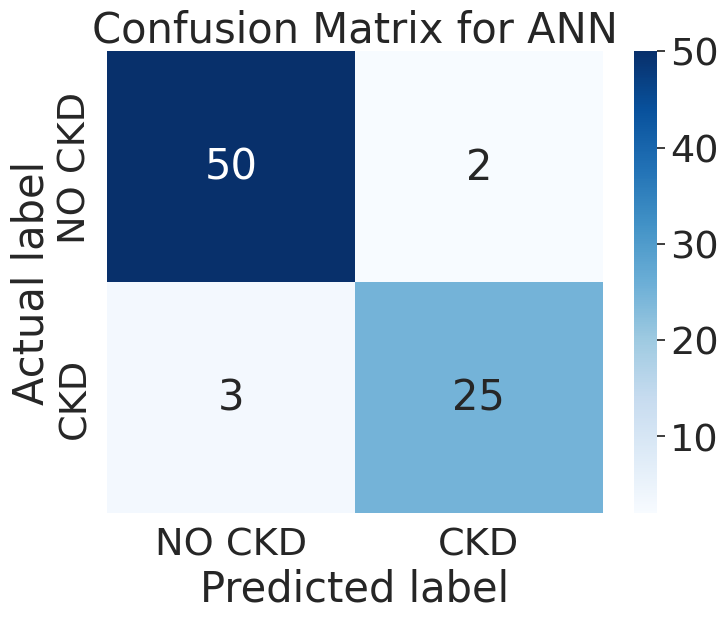

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['NO CKD', 'CKD'], yticklabels=['NO CKD', 'CKD'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for ANN')
plt.show()

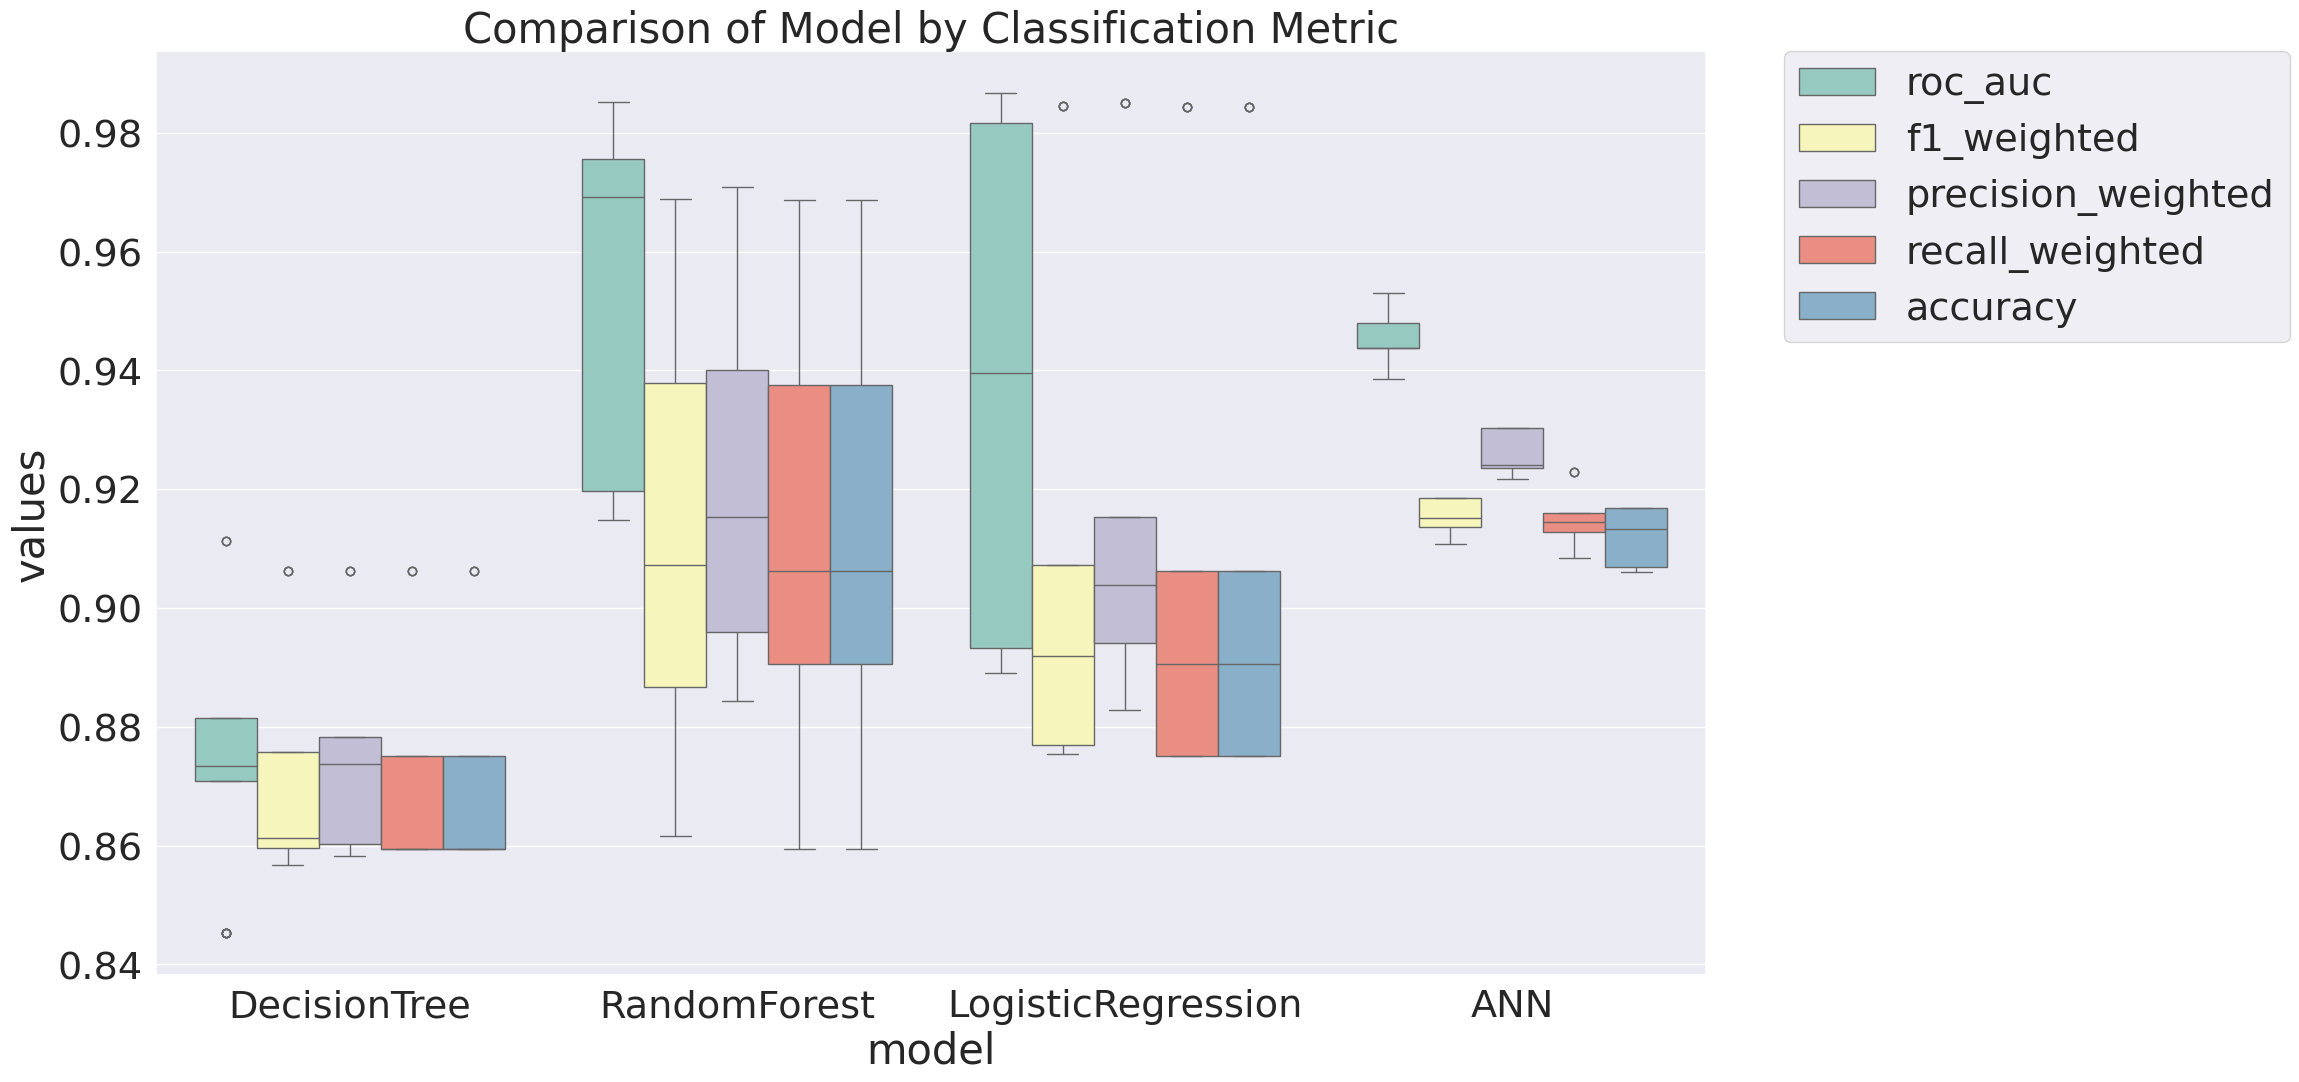

In [ ]:
#valuate results
bootstraps=[]
for model in list(set(final.model.values)):
  model_df=final.loc[final.model==model]
  bootstrap=model_df.sample(n=30,replace=True)
  bootstraps.append(bootstrap)

bootstrap_df=pd.concat(bootstraps,ignore_index=True)
results_long=pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics=['fit_time','score_time']
##Performance
results_long_nofit=results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit=results_long_nofit.sort_values(by='values')
#time
results_long_fit=results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit=results_long_fit.sort_values(by='values')

plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g=sns.boxplot(x='model',y='values',hue='metrics',data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png')

In [7]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np # Import numpy
from collections import Counter as c # Import Counter
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the dataset
data = pd.read_csv("/content/kidney_disease.csv")

# Rename columns
data.columns=['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood glucose random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia', 'class']

# Drop the 'id' column
data.drop('id', axis=1, inplace=True)

# Handle missing numerical values with mean
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)

# Convert object columns to numeric and fill missing values with mean
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)

# Handle missing categorical values with mode
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

# Clean and label encode categorical columns
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

for i in catcols:
  LEi = LabelEncoder()
  data[i] = LEi.fit_transform(data[i])

# Define independent and dependent variables
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])

# Splitting into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Define and train the Logistic Regression model
lgr = LogisticRegression(max_iter=1000)
lgr.fit(x_train, y_train)

# Save the Logistic Regression model
filename = 'logistic_regression_model.pkl'
pickle.dump(lgr, open(filename, 'wb'))

print(f"Logistic Regression model saved to {filename}")

/tmp/ipython-input-7-2927656442.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
/tmp/ipython-input-7-2927656442.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

Logistic Regression model saved to logistic_regression_model.pkl


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from google.colab import files

files.download('logistic_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')